# House Price Prediction

> 1. Introduction
    0.
    1.
    
> 3. Preprocessing
    1. Data Quality Assessment
    2. Feature Aggregation
    3. Feature Sampling
    4. Dimensionality Reduction
    5. Feature Encoding

# 1.0 Introduction


> Here we intend to predict the price of the houses with the various given features

# 1.1 Importing libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [72]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

In [17]:
import time
from scipy.stats import pearsonr
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

In [18]:
# Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# 2.0 Collecting the data

In [19]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [20]:
df = pd.concat([train, test], ignore_index=True)
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000.0


In [21]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000.0


In [22]:
data_0 = df.copy()

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

> There a lot of features with non-numeric data which will be required to be Encoded for our code to parse it.

> - To Drop:
    - Alley, PoolQC, Fence, MiscFeature, FireplaceQu (too many non-null value to interpret)
    - Id (Irrelevant Data)

## Dropping irrelevant features

In [24]:
df = df.drop(['Id'], axis=1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

## Null Values

- Null:	
	- MSZoning, Utilities, Exterior1st, Exterior2nd, Electrical, BsmtFullBath(No Bsmt), BsmtHalfBath(No Bsmt), KitchenQual, Functional, GarageYrBlt(Not all), GarageFinish(Not all), GarageQual(Not all), GarageCond(Not all), SaleType


- Legit:
	- Numeric: LotFrontage, MasVnrArea, BsmtFinSF1, BsmtFinSF2, 
		BsmtUnfSF, TotalBsmtSF, GarageYrBlt(Not all), 
		GarageFinish(Not all), GarageCars, GarageArea, 
		GarageQual(Not all), GarageCond(Not all) 
	
	- Object: Alley, MasVnrType, GarageType, MiscFeature, 
	
	- Obj-Num: BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, PoolQC, Fence, 

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [27]:
i = 0
for x in range(len(df.columns)):
    if df.iloc[:,x].isnull().sum() > 0:
        i += 1
print(i)

35


## Null:

In [28]:
null_num = ['BsmtFullBath', 'BsmtHalfBath']
null_com = ['GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
null_obj = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'Electrical', 'KitchenQual', 'Functional', 'SaleType']

In [29]:
for x in null_num:
    df[x].fillna(df[x].median(), inplace = True)

for x in null_obj:
    df[x].fillna(df[x].mode()[0], inplace = True)

In [30]:
for x in null_com:
    df[x].fillna(0, inplace=True)

## Legit:
### Numeric:
> Here null values are directly replaced by 0

In [31]:
df["LotFrontage"].fillna(0, inplace = True)
df["MasVnrArea"].fillna(0, inplace=True)
df["BsmtFinSF1"].fillna(0, inplace=True)
df["BsmtFinSF2"].fillna(0, inplace=True)
df["BsmtUnfSF"].fillna(0, inplace=True)
df["TotalBsmtSF"].fillna(0, inplace=True)
df["GarageCars"].fillna(0, inplace=True)
df["GarageArea"].fillna(0, inplace=True)
df["LotFrontage"].value_counts()

0.0      486
60.0     276
80.0     137
70.0     133
50.0     117
        ... 
155.0      1
141.0      1
136.0      1
28.0       1
137.0      1
Name: LotFrontage, Length: 129, dtype: int64

### Object:
> Here null values are directly replaced by 'No'

In [32]:
df["Alley"].fillna('No', inplace = True)
df["MasVnrType"].fillna('No', inplace = True)
df["GarageType"].fillna('No', inplace = True)
df["MiscFeature"].fillna('No', inplace = True)
df["BsmtQual"].fillna('No', inplace = True)
df["BsmtCond"].fillna('No', inplace = True)
df["BsmtExposure"].fillna('No', inplace = True)
df["BsmtFinType1"].fillna('No', inplace = True)
df["BsmtFinType2"].fillna('No', inplace = True)
df["FireplaceQu"].fillna('No', inplace = True)
df["PoolQC"].fillna('No', inplace = True)
df["Fence"].fillna('No', inplace = True)

## Complex
> For the Values with complexity

In [33]:
for x in range(df.shape[0]):
    for y in null_com:
        if df.iloc[x,df.columns.get_loc("GarageType")] == 'No':
            df.iloc[x,df.columns.get_loc(y)] = 0
        elif df.iloc[x,df.columns.get_loc("GarageType")] != 'No' and df.iloc[x,df.columns.get_loc(y)] == 'No':
            df.iloc[x,df.columns.get_loc(y)] = df[y].median()

> Using One Hot Encoder
### One Hot Encoder

In [34]:
columns_numeric = list(df.dtypes[(df.dtypes=='int64') | (df.dtypes=='float64') ].index)
len(columns_numeric)

37

In [35]:
columns_object = list(df.dtypes[df.dtypes=='object'].index)
len(columns_object)

43

In [36]:
a = df.corr()['SalePrice']
a

MSSubClass      -0.084284
LotFrontage      0.209624
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.261366
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [37]:
df2 = df.copy()
for x in columns_object:
    temp = pd.get_dummies(df2[x],prefix=x)
    df2 = pd.concat([df2,temp],axis=1)
    df2.drop(x,axis=1,inplace=True)
df2.shape

(2919, 303)

In [38]:
df2.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=303)

## Splitting Target and Feature Variables

In [39]:
X = df2.drop(['SalePrice'], axis=1)
y = df2['SalePrice']
X_train = X.iloc[:1460,:]
y_train = y.iloc[:1460]

# Feature Handling:
## Feature Selection:

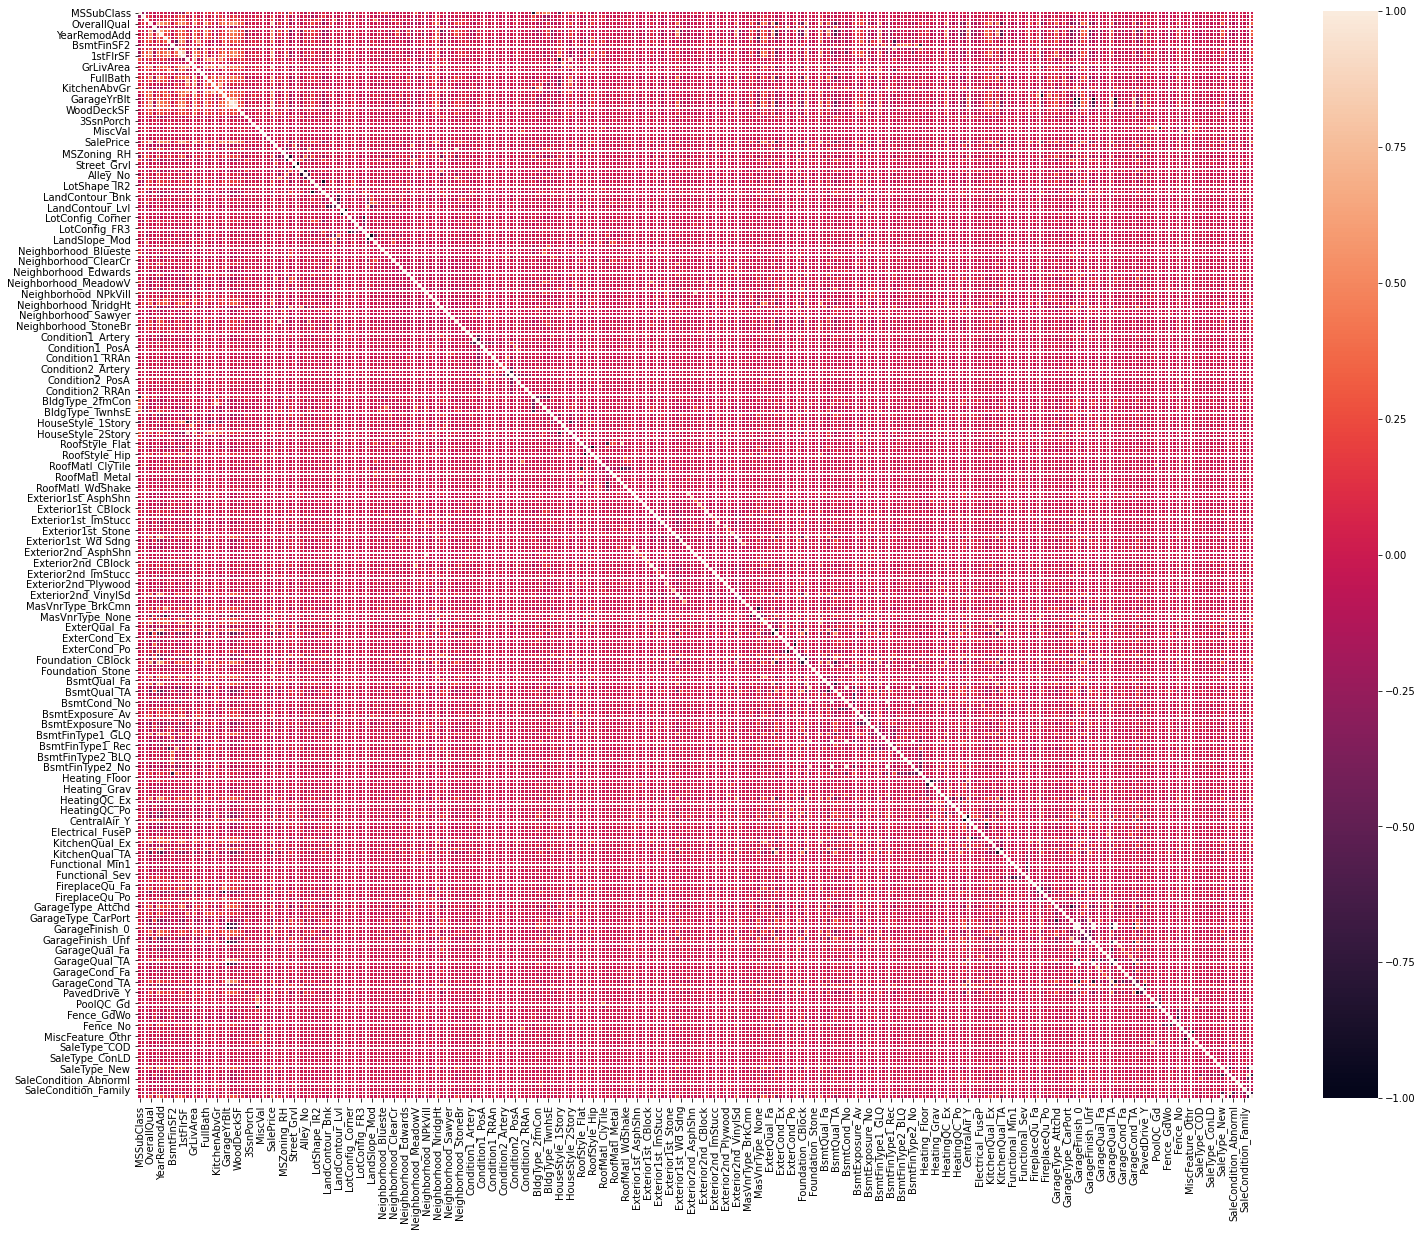

In [40]:
plt.subplots(figsize = (25,20))
sns.heatmap(df2.corr(method='pearson'), annot=False, linewidths=0.2)

## Correlation of all the features with themselves

In [41]:
corr = X.corr(method='pearson')
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = X.columns[columns]
X2 = X[selected_columns]

In [42]:
X2

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,0,1
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,0,1
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,0,1
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,1,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1
2915,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,0,1,1,0,0,0,0
2916,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,0,1,1,0,0,0,0
2917,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,0,1,0,0,0,0,1


In [43]:
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
MSSubClass,1.000000,-0.229823,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.006309,-0.064002,-0.072431,...,0.001218,-0.040736,-0.018118,0.039077,0.003719,0.011253,0.037366,-0.023187,0.027341,-0.045302
LotFrontage,-0.229823,1.000000,0.135246,0.132635,-0.036252,0.027906,0.070162,0.108969,0.069193,-0.004681,...,-0.008052,0.165565,-0.000077,-0.134998,0.017603,-0.007709,0.012534,0.019370,-0.139704,0.165680
LotArea,-0.201730,0.135246,1.000000,0.100541,-0.035617,0.024128,0.021612,0.124728,0.194168,0.084107,...,-0.015732,0.031601,-0.004067,-0.013592,-0.014771,-0.020429,0.024241,0.017927,-0.022898,0.033434
OverallQual,0.033638,0.132635,0.100541,1.000000,-0.093847,0.597554,0.571532,0.426528,0.282150,-0.042605,...,-0.045148,0.338330,-0.052783,-0.195075,-0.127006,-0.049636,-0.040738,-0.023605,-0.134282,0.333192
OverallCond,-0.065625,-0.036252,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.133118,-0.050823,0.041359,...,-0.014818,-0.148122,-0.018578,0.163118,-0.060231,-0.051836,-0.025736,-0.032058,0.168425,-0.143560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,0.011253,-0.007709,-0.020429,-0.049636,-0.051836,-0.077741,-0.078213,-0.018316,-0.028047,-0.018827,...,-0.003368,-0.019187,-0.003150,0.025342,-0.016953,1.000000,-0.005850,-0.008130,-0.138487,-0.019448
SaleCondition_Alloca,0.037366,0.012534,0.024241,-0.040738,-0.025736,-0.025116,-0.034022,-0.019720,0.026130,-0.026680,...,-0.004773,-0.027190,-0.004464,0.035914,-0.024025,-0.005850,1.000000,-0.011521,-0.196256,-0.027560
SaleCondition_Family,-0.023187,0.019370,0.017927,-0.023605,-0.032058,-0.036093,-0.049794,-0.017386,-0.026187,-0.001984,...,0.045983,-0.037787,0.050036,-0.014561,-0.033388,-0.008130,-0.011521,1.000000,-0.272742,-0.038301
SaleCondition_Normal,0.027341,-0.139704,-0.022898,-0.134282,0.168425,-0.137934,-0.102889,-0.065257,-0.016976,0.068989,...,0.007156,-0.643684,-0.087334,0.621477,-0.568743,-0.138487,-0.196256,-0.272742,1.000000,-0.652444


## Correlation of the target variable with all the features 

In [44]:
X2_train = X2.iloc[:1460,:]
df3 = X2.copy()
df3['SalePrice'] = y
corr = df3.corr(method='pearson')['SalePrice']

In [154]:
flag = 0
for x in range(len(corr)):
    if corr[x] < 0.05 and corr[x] > -0.05:
        flag += 1
        print(f"Dropping column: {df2.columns[x]}: {corr[x]}")
        df3 = df3.drop([X2.columns[x]], axis=1)
        print()
print(f"flag: {flag}")

Dropping column: BsmtFinSF2: -0.011378121450215216

Dropping column: LowQualFinSF: -0.02560613000068015

Dropping column: BsmtHalfBath: -0.016844154297359294

Dropping column: 3SsnPorch: 0.04458366533574792

Dropping column: MiscVal: -0.02118957964030379

Dropping column: MoSold: 0.04643224522381936

Dropping column: YrSold: -0.028922585168730426

Dropping column: MSZoning_RM: -0.04103553550004982

Dropping column: Street_Grvl: 0.04103553550004989

Dropping column: Alley_No: -0.027655379955633733

Dropping column: LotShape_IR2: 0.036720475499535554

Dropping column: LandContour_HLS: 0.04552825032749539

Dropping column: LandContour_Low: -0.02754457933083911

Dropping column: LandContour_Lvl: 0.014314296147248953

Dropping column: Utilities_AllPub: -0.014314296147248952

Dropping column: Utilities_NoSeWa: 0.004144823294072492

Dropping column: LotConfig_CulDSac: -0.0068588907827759355

Dropping column: LotConfig_FR2: 0.018185562475503233

Dropping column: LandSlope_Gtl: 0.04298115994437

In [155]:
df3

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,Fence_No,MiscFeature_No,MiscFeature_Shed,SaleType_COD,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Normal,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,150.0,...,1,1,0,0,0,1,0,0,1,208500.0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,284.0,...,1,1,0,0,0,1,0,0,1,181500.0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,434.0,...,1,1,0,0,0,1,0,0,1,223500.0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,540.0,...,1,1,0,0,0,1,1,0,0,140000.0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,490.0,...,1,1,0,0,0,1,0,0,1,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,21.0,1936,4,7,1970,1970,0.0,0.0,546.0,...,1,1,0,0,0,1,0,0,1,NaN
2915,160,21.0,1894,4,5,1970,1970,0.0,252.0,294.0,...,1,1,0,0,0,1,1,0,0,NaN
2916,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,1,1,0,0,0,1,1,0,0,NaN
2917,85,62.0,10441,5,5,1992,1992,0.0,337.0,575.0,...,0,0,1,0,0,1,0,0,1,NaN


*SelectKBest and chi2*

> #apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=100)
fit = bestfeatures.fit(X2_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X2_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(100,'Score'))  #print 10 best features

*ExtraTreesClassifier*
> from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X2_train,y_train)
feat_importances = pd.Series(model.feature_importances_, index=X2_train.columns)
print(feat_importances)

# Model

## Splitting of data

In [156]:
X = df3.drop(['SalePrice'], axis=1)
y = df3['SalePrice']
X_t = X.iloc[:1460,:]
y_t = y.iloc[:1460]
X_test = X.iloc[1460:,:]
y_test = y.iloc[1460:]

In [157]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X.iloc[:1460,:], y.iloc[:1460], test_size = 0.3, random_state = 0)

## Standardizing Data
> Reducing the accuracy thereby not performing

In [89]:
'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
'''

# Multiple Linear Regression

In [103]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
start = time.time()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_val)
time_ML = time.time() - start
acc01 = round(r2_score(y_val, y_pred),4)
print('Linear regression accuracy : ' ,acc01)

Linear regression accuracy :  0.7985


In [104]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))
print('Root Mean Log Squared Error:', np.sqrt(mean_squared_log_error(y_val, y_pred)))
RMLSE_ML = np.sqrt(mean_squared_log_error(y_val, y_pred))

Mean Absolute Error: 18914.889992250184
Mean Squared Error: 1368225263.8053331
Root Mean Squared Error: 36989.52911034869
Root Mean Log Squared Error: 0.15718200825170445


# Decision Tree

In [105]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(max_depth=2, random_state=0, max_leaf_nodes=2)
start = time.time()
regr.fit(X_train, y_train)
y_pred01 = regr.predict(X_val)
time_DT = time.time() - start
acc02 = round(r2_score(y_val, y_pred01),4)
print('Decision tree regression accuracy : ' ,acc02)

Decision tree regression accuracy :  0.4683


In [106]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred01))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred01))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred01)))
print('Root Mean Log Squared Error:', np.sqrt(mean_squared_log_error(y_val, y_pred01)))
RMLSE_DT = np.sqrt(mean_squared_log_error(y_val, y_pred01))

Mean Absolute Error: 44119.82194267656
Mean Squared Error: 3609701201.211137
Root Mean Squared Error: 60080.78895296846
Root Mean Log Squared Error: 0.3075830173527023


# Random Forest

In [107]:
# randomforest = RandomForestRegressor(n_estimators=200, random_state=2)
randomforest = RandomForestRegressor(n_estimators=400, random_state=2, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=None, bootstrap=False)
# randomforest = RandomForestRegressor(n_estimators=110, random_state=2, min_samples_split=6, min_samples_leaf=2, max_features='auto', max_depth=20, bootstrap=True)
start = time.time()
randomforest.fit(X_train, y_train)
y_pred02= randomforest.predict(X_val)
time_RF = time.time() - start
acc03 = round(r2_score(y_val, y_pred02),4)
print('Random Forest Regression accuracy : ' ,acc03)

Random Forest Regression accuracy :  0.8677


In [108]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred02))  
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred02))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred02)))
print('Root Mean Log Squared Error:', np.sqrt(mean_squared_log_error(y_val, y_pred02)))
RMLSE_RF = np.sqrt(mean_squared_log_error(y_val, y_pred02))

Mean Absolute Error: 16718.623533105023
Mean Squared Error: 898428087.9165614
Root Mean Squared Error: 29973.790015888237
Root Mean Log Squared Error: 0.12998673534717886


### Hyperparameter Tuning(RF)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
rf_random.best_params_

In [148]:
tuple(rf_random.best_params_)

('n_estimators',
 'min_samples_split',
 'min_samples_leaf',
 'max_features',
 'max_depth',
 'bootstrap')

# Support Vector

In [109]:
from sklearn.svm import SVR

regr01 = SVR(kernel='linear')
start = time.time()
regr01.fit(X_train, y_train)
y_pred03 = regr01.predict(X_val)
time_SV = time.time() - start
acc04 = round(r2_score(y_val, y_pred03),4)
print('SVR accuracy : ' ,acc04)

SVR accuracy :  0.6504


In [110]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred03))  
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred03))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred03)))
print('Root Mean Log Squared Error:', np.sqrt(mean_squared_log_error(y_val, y_pred03)))
RMLSE_SV = np.sqrt(mean_squared_log_error(y_val, y_pred03))

Mean Absolute Error: 23878.28632427737
Mean Squared Error: 2373414560.1989336
Root Mean Squared Error: 48717.702739342436
Root Mean Log Squared Error: 0.18595970214498306


# Gradient Boosting

In [167]:
gb = GradientBoostingRegressor(n_estimators=1400, random_state=2, min_samples_split=10, min_samples_leaf=1, max_features='sqrt', max_depth=20, learning_rate=0.01)
start = time.time()
gb.fit(X_train, y_train)
y_pred04= gb.predict(X_val)
time_GB = time.time() - start
acc05 = round(r2_score(y_val, y_pred04),4)
print('Gradient Boosting accuracy : ' ,acc05)

Gradient Boosting accuracy :  0.8748


### Hyperparameter Tuning(GB)

In [158]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Learning rate
learning_rate = [1, 0.5, 0.25, 0.1, 0.05, 0.01]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'learning_rate': learning_rate}
print(random_grid)

gb = GradientBoostingRegressor()
gb_random = RandomizedSearchCV(estimator = gb, param_distributions = random_grid, n_iter = 1, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
gb_random.fit(X_train, y_train)
gb_random.best_params_

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01]}
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    8.2s finished


{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 50,
 'learning_rate': 0.1}

In [147]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred04))  
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred04))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred04)))
print('Root Mean Log Squared Error:', np.sqrt(mean_squared_log_error(y_val, y_pred04)))
RMLSE_GB = np.sqrt(mean_squared_log_error(y_val, y_pred04))

Mean Absolute Error: 16163.238429407664
Mean Squared Error: 850313894.9882045
Root Mean Squared Error: 29160.142231961156
Root Mean Log Squared Error: 0.12613168225023935


# Ada Boost

In [100]:
from sklearn.ensemble import AdaBoostRegressor

adb = AdaBoostRegressor(random_state=101)
start = time.time()
adb.fit(X_train, y_train)
y_pred05= adb.predict(X_val)
time_AB = time.time() - start
acc06 = round(r2_score(y_val, y_pred05),4)
print('ADA Boosting accuracy : ' ,acc06)

ADA Boosting accuracy :  0.8097


In [101]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred05))  
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred05))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred05)))
print('Root Mean Log Squared Error:', np.sqrt(mean_squared_log_error(y_val, y_pred05)))
RMLSE_AB = np.sqrt(mean_squared_log_error(y_val, y_pred05))

Mean Absolute Error: 23964.43618614187
Mean Squared Error: 1291819502.3352945
Root Mean Squared Error: 35941.89063384527
Root Mean Log Squared Error: 0.1829805242704462


# Final Result

In [168]:
models= pd.DataFrame({ 
"Model" : ["MultipleLinearRegression", "DecisionTreeRegression", "RandomForestRegression", "SVR","Gradient Boosting", "Adaboost"],
"Accuracy" : [acc01, acc02, acc03, acc04, acc05, acc06],
"Time" : [time_ML, time_DT, time_RF, time_SV, time_GB, time_AB],
"RMLSE" : [RMLSE_ML, RMLSE_DT, RMLSE_RF, RMLSE_SV, RMLSE_GB, RMLSE_AB]
})
model_notime = pd.DataFrame({ 
"Model" : ["MultipleLinearRegression", "DecisionTreeRegression", "RandomForestRegression", "SVR","Gradient Boosting", "Adaboost"],
"Accuracy" : [acc01, acc02, acc03, acc04, acc05, acc06]
})
model_time = pd.DataFrame({ 
"Model" : ["MultipleLinearRegression", "DecisionTreeRegression", "RandomForestRegression", "SVR","Gradient Boosting", "Adaboost"],
"Time" : [time_ML, time_DT, time_RF, time_SV, time_GB, time_AB]
})
models

,Model,Accuracy,Time,RMLSE
0,MultipleLinearRegression,0.7985,0.065823,0.157182
1,DecisionTreeRegression,0.4683,0.012982,0.307583
2,RandomForestRegression,0.8677,1.358484,0.129987
3,SVR,0.6504,14.128023,0.185960
4,Gradient Boosting,0.8748,3.274904,0.126132
5,Adaboost,0.8097,0.343122,0.182981


In [169]:
models.sort_values(by="RMLSE")

,Model,Accuracy,Time,RMLSE
4,Gradient Boosting,0.8748,3.274904,0.126132
2,RandomForestRegression,0.8677,1.358484,0.129987
0,MultipleLinearRegression,0.7985,0.065823,0.157182
5,Adaboost,0.8097,0.343122,0.182981
3,SVR,0.6504,14.128023,0.185960
1,DecisionTreeRegression,0.4683,0.012982,0.307583


# Submissions

In [159]:
gb = GradientBoostingRegressor(n_estimators=1400, random_state=2, min_samples_split=10, min_samples_leaf=1, max_features='sqrt', max_depth=20, learning_rate=0.01)
gb.fit(X_t, y_t)
y_pred = gb.predict(X_test)

In [160]:
submit = data_0.iloc[1460:,0]
submit = pd.DataFrame(submit)

In [161]:
submit['SalePrice'] = y_pred

In [162]:
submit

,Id,SalePrice
1460,1461,124381.085171
1461,1462,153471.689216
1462,1463,182616.707484
1463,1464,191402.891238
1464,1465,187014.583722
...,...,...
2914,2915,86224.440809
2915,2916,87247.610357
2916,2917,162598.389322
2917,2918,113526.397867


In [146]:
submit.to_csv('Submission.csv', index=False)